In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
print("Libraries imported")

Libraries imported


In [3]:
df = pd.read_csv('../data/gdp.csv')
df

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.3k,27.8k,27.6k,28.4k,28.9k,30.3k,31.7k,31.8k,25.8k,30.3k
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,596,608,603,592,590,589,579,584,553,426
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120,3150,3190,3100,2910,2810,2680,2570,2350,2300
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3740,3780,3860,3950,4090,4250,4430,4540,4410,4830
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.2k,37.6k,38.4k,38.9k,39.9k,39.3k,39.3k,39.4k,34.4k,36.8k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3980,3940,3930,4050,4330,4350,4280,4420,4220,3860
207,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2150,2190,2120,1490,1310,1220,1190,NaN,NaN,NaN
208,South Africa,3970,4010,4140,4310,4510,4640,4700,4880,4930,...,6190,6260,6250,6200,6190,6230,6250,6190,5730,5950
209,Zambia,1200,1180,1110,1110,1210,1370,1250,1310,1280,...,1270,1290,1310,1310,1320,1320,1330,1310,1240,1260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  211 non-null    object
 1   1960     87 non-null     object
 2   1961     91 non-null     object
 3   1962     91 non-null     object
 4   1963     91 non-null     object
 5   1964     91 non-null     object
 6   1965     96 non-null     object
 7   1966     99 non-null     object
 8   1967     100 non-null    object
 9   1968     102 non-null    object
 10  1969     102 non-null    object
 11  1970     112 non-null    object
 12  1971     112 non-null    object
 13  1972     112 non-null    object
 14  1973     112 non-null    object
 15  1974     114 non-null    object
 16  1975     116 non-null    object
 17  1976     118 non-null    object
 18  1977     124 non-null    object
 19  1978     124 non-null    object
 20  1979     125 non-null    object
 21  1980     137 non-null    object
 22  19

In [5]:
df.isnull().sum()

country      0
1960       124
1961       120
1962       120
1963       120
          ... 
2017         5
2018         5
2019         7
2020        10
2021        15
Length: 63, dtype: int64

In [6]:
def convert_gdp_to_numeric(gdp):
    if isinstance(gdp, str) and 'k' in gdp:
        return float(gdp.replace('k', '')) * 1000
    elif pd.isnull(gdp):
        return gdp
    else:
        return float(gdp)

# Apply the function to all GDP columns
for year in df.columns[1:]:
    df[year] = df[year].apply(convert_gdp_to_numeric)

# Display the first few rows of the DataFrame
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26300.0,27800.0,27600.0,28400.0,28900.0,30300.0,31700.0,31800.0,25800.0,30300.0
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,596.0,608.0,603.0,592.0,590.0,589.0,579.0,584.0,553.0,426.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120.0,3150.0,3190.0,3100.0,2910.0,2810.0,2680.0,2570.0,2350.0,2300.0
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3740.0,3780.0,3860.0,3950.0,4090.0,4250.0,4430.0,4540.0,4410.0,4830.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39200.0,37600.0,38400.0,38900.0,39900.0,39300.0,39300.0,39400.0,34400.0,36800.0


In [7]:
dft = df.fillna(df.mean())

# Display the first few rows of the filled DataFrame
dft.head()

C:\Users\verma\AppData\Local\Temp\ipykernel_13632\3544689443.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dft = df.fillna(df.mean())


,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,4611.678161,4625.692308,4755.736264,4892.065934,5150.692308,5396.625,5485.464646,5625.64,5904.578431,...,26300.0,27800.0,27600.0,28400.0,28900.0,30300.0,31700.0,31800.0,25800.0,30300.0
1,Afghanistan,4611.678161,4625.692308,4755.736264,4892.065934,5150.692308,5396.625,5485.464646,5625.64,5904.578431,...,596.0,608.0,603.0,592.0,590.0,589.0,579.0,584.0,553.0,426.0
2,Angola,4611.678161,4625.692308,4755.736264,4892.065934,5150.692308,5396.625,5485.464646,5625.64,5904.578431,...,3120.0,3150.0,3190.0,3100.0,2910.0,2810.0,2680.0,2570.0,2350.0,2300.0
3,Albania,4611.678161,4625.692308,4755.736264,4892.065934,5150.692308,5396.625,5485.464646,5625.64,5904.578431,...,3740.0,3780.0,3860.0,3950.0,4090.0,4250.0,4430.0,4540.0,4410.0,4830.0
4,Andorra,4611.678161,4625.692308,4755.736264,4892.065934,5150.692308,5396.625,5485.464646,5625.64,5904.578431,...,39200.0,37600.0,38400.0,38900.0,39900.0,39300.0,39300.0,39400.0,34400.0,36800.0


C:\Users\verma\AppData\Local\Temp\ipykernel_13632\1770100617.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_gdp_per_capita = dft.mean()


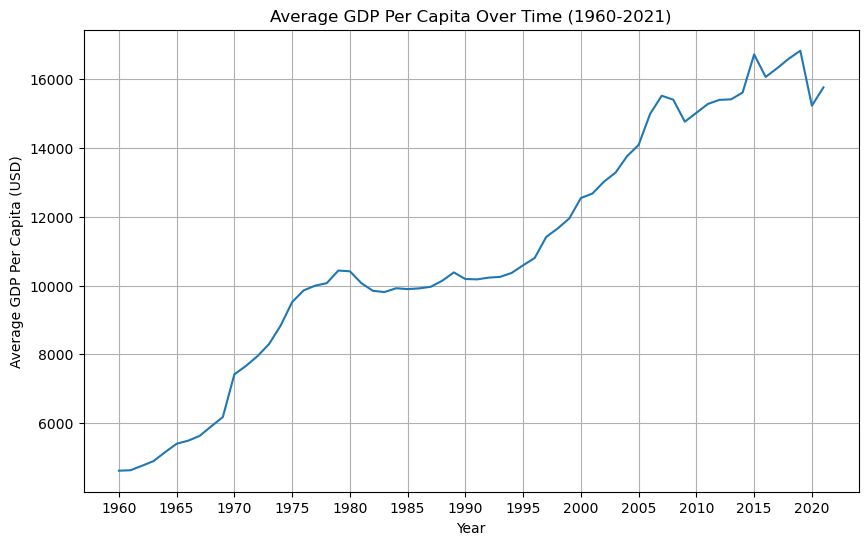

In [8]:
mean_gdp_per_capita = dft.mean()

# Create a line plot of the mean GDP per capita over time
plt.figure(figsize=(10, 6))
plt.plot(mean_gdp_per_capita.index, mean_gdp_per_capita.values)
plt.title('Average GDP Per Capita Over Time (1960-2021)')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita (USD)')
plt.grid(True)

# Set the xticks to every 5 years
plt.xticks(mean_gdp_per_capita.index[::5])

plt.show()

In [9]:
df_decades = dft.copy()
df_decades.columns = df_decades.columns.astype(str)
df_decades = df_decades.melt(id_vars=['country'], var_name='Year', value_name='GDP Per Capita')
df_decades['Decade'] = (df_decades['Year'].astype(int) // 10) * 10
df_decades

,country,Year,GDP Per Capita,Decade
0,Aruba,1960,4611.678161,1960
1,Afghanistan,1960,4611.678161,1960
2,Angola,1960,4611.678161,1960
3,Albania,1960,4611.678161,1960
4,Andorra,1960,4611.678161,1960
...,...,...,...,...
13077,Samoa,2021,3860.000000,2020
13078,Yemen,2021,15765.051020,2020
13079,South Africa,2021,5950.000000,2020
13080,Zambia,2021,1260.000000,2020


In [10]:
country = dft.transpose()
country


,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1960,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,7410.0,4611.678161,4611.678161,4611.678161,...,4611.678161,1890.0,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,3970.0,1200.0,1140.0
1961,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,7690.0,4625.692308,4625.692308,4625.692308,...,4625.692308,1940.0,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4010.0,1180.0,1170.0
1962,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,7500.0,4755.736264,4755.736264,4755.736264,...,4755.736264,1980.0,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4140.0,1110.0,1150.0
1963,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,6990.0,4892.065934,4892.065934,4892.065934,...,4892.065934,1830.0,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4310.0,1110.0,1190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,30300.0,589.0,2810.0,4250.0,39300.0,43400.0,13600.0,3990.0,12400.0,16000.0,...,2940.0,7890.0,34400.0,2900.0,2800.0,4350.0,1220.0,6230.0,1320.0,1420.0
2018,31700.0,579.0,2680.0,4430.0,39300.0,43600.0,13100.0,4220.0,13000.0,17000.0,...,3050.0,8150.0,35200.0,3090.0,2820.0,4280.0,1190.0,6250.0,1330.0,1460.0
2019,31800.0,584.0,2570.0,4540.0,39400.0,43800.0,12700.0,4560.0,13300.0,17700.0,...,3160.0,8210.0,36300.0,3290.0,2840.0,4420.0,16833.014706,6190.0,1310.0,1340.0
2020,25800.0,553.0,2350.0,4410.0,34400.0,41300.0,11300.0,4260.0,14300.0,14000.0,...,3160.0,7800.0,35600.0,3350.0,2620.0,4220.0,15232.731343,5730.0,1240.0,1210.0


In [11]:
country.columns=country.iloc[0]
cou = country[1:]
cou

country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1960,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,7410.0,4611.678161,4611.678161,4611.678161,...,4611.678161,1890.0,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,3970.0,1200.0,1140.0
1961,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,7690.0,4625.692308,4625.692308,4625.692308,...,4625.692308,1940.0,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4010.0,1180.0,1170.0
1962,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,7500.0,4755.736264,4755.736264,4755.736264,...,4755.736264,1980.0,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4140.0,1110.0,1150.0
1963,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,6990.0,4892.065934,4892.065934,4892.065934,...,4892.065934,1830.0,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4310.0,1110.0,1190.0
1964,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,7570.0,5150.692308,5150.692308,5150.692308,...,5150.692308,1860.0,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,4510.0,1210.0,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,30300.0,589.0,2810.0,4250.0,39300.0,43400.0,13600.0,3990.0,12400.0,16000.0,...,2940.0,7890.0,34400.0,2900.0,2800.0,4350.0,1220.0,6230.0,1320.0,1420.0
2018,31700.0,579.0,2680.0,4430.0,39300.0,43600.0,13100.0,4220.0,13000.0,17000.0,...,3050.0,8150.0,35200.0,3090.0,2820.0,4280.0,1190.0,6250.0,1330.0,1460.0
2019,31800.0,584.0,2570.0,4540.0,39400.0,43800.0,12700.0,4560.0,13300.0,17700.0,...,3160.0,8210.0,36300.0,3290.0,2840.0,4420.0,16833.014706,6190.0,1310.0,1340.0
2020,25800.0,553.0,2350.0,4410.0,34400.0,41300.0,11300.0,4260.0,14300.0,14000.0,...,3160.0,7800.0,35600.0,3350.0,2620.0,4220.0,15232.731343,5730.0,1240.0,1210.0


In [12]:
coun = pd.read_csv('../data/coun.csv')

In [13]:
coun

,Unnamed: 0,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,0,1960,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,7410.0,4611.678161,...,4611.678161,1890.0,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,3970.0,1200.0,1140.0
1,1,1961,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,7690.0,4625.692308,...,4625.692308,1940.0,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4010.0,1180.0,1170.0
2,2,1962,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,7500.0,4755.736264,...,4755.736264,1980.0,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4140.0,1110.0,1150.0
3,3,1963,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,6990.0,4892.065934,...,4892.065934,1830.0,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4310.0,1110.0,1190.0
4,4,1964,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,7570.0,5150.692308,...,5150.692308,1860.0,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,4510.0,1210.0,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,2017,30300.000000,589.000000,2810.000000,4250.000000,39300.000000,43400.000000,13600.0,3990.000000,...,2940.000000,7890.0,34400.000000,2900.000000,2800.000000,4350.000000,1220.000000,6230.0,1320.0,1420.0
58,58,2018,31700.000000,579.000000,2680.000000,4430.000000,39300.000000,43600.000000,13100.0,4220.000000,...,3050.000000,8150.0,35200.000000,3090.000000,2820.000000,4280.000000,1190.000000,6250.0,1330.0,1460.0
59,59,2019,31800.000000,584.000000,2570.000000,4540.000000,39400.000000,43800.000000,12700.0,4560.000000,...,3160.000000,8210.0,36300.000000,3290.000000,2840.000000,4420.000000,16833.014706,6190.0,1310.0,1340.0
60,60,2020,25800.000000,553.000000,2350.000000,4410.000000,34400.000000,41300.000000,11300.0,4260.000000,...,3160.000000,7800.0,35600.000000,3350.000000,2620.000000,4220.000000,15232.731343,5730.0,1240.0,1210.0


In [14]:
coun.rename(columns={'Unnamed: 0': 'year'}, inplace=True)

In [15]:
coun

,year,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,0,1960,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,7410.0,4611.678161,...,4611.678161,1890.0,4611.678161,4611.678161,4611.678161,4611.678161,4611.678161,3970.0,1200.0,1140.0
1,1,1961,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,7690.0,4625.692308,...,4625.692308,1940.0,4625.692308,4625.692308,4625.692308,4625.692308,4625.692308,4010.0,1180.0,1170.0
2,2,1962,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,7500.0,4755.736264,...,4755.736264,1980.0,4755.736264,4755.736264,4755.736264,4755.736264,4755.736264,4140.0,1110.0,1150.0
3,3,1963,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,6990.0,4892.065934,...,4892.065934,1830.0,4892.065934,4892.065934,4892.065934,4892.065934,4892.065934,4310.0,1110.0,1190.0
4,4,1964,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,7570.0,5150.692308,...,5150.692308,1860.0,5150.692308,5150.692308,5150.692308,5150.692308,5150.692308,4510.0,1210.0,1140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,2017,30300.000000,589.000000,2810.000000,4250.000000,39300.000000,43400.000000,13600.0,3990.000000,...,2940.000000,7890.0,34400.000000,2900.000000,2800.000000,4350.000000,1220.000000,6230.0,1320.0,1420.0
58,58,2018,31700.000000,579.000000,2680.000000,4430.000000,39300.000000,43600.000000,13100.0,4220.000000,...,3050.000000,8150.0,35200.000000,3090.000000,2820.000000,4280.000000,1190.000000,6250.0,1330.0,1460.0
59,59,2019,31800.000000,584.000000,2570.000000,4540.000000,39400.000000,43800.000000,12700.0,4560.000000,...,3160.000000,8210.0,36300.000000,3290.000000,2840.000000,4420.000000,16833.014706,6190.0,1310.0,1340.0
60,60,2020,25800.000000,553.000000,2350.000000,4410.000000,34400.000000,41300.000000,11300.0,4260.000000,...,3160.000000,7800.0,35600.000000,3350.000000,2620.000000,4220.000000,15232.731343,5730.0,1240.0,1210.0


In [16]:
cou.describe()

country,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
count,62.0,62.000000,62.0,62.0,62.0,62.0,62.0,62.000000,62.0,62.0,...,62.0,62.0,62.000000,62.000000,62.0,62.0,62.0,62.0,62.0,62.0
unique,57.0,62.000000,59.0,57.0,51.0,60.0,50.0,62.000000,53.0,54.0,...,58.0,57.0,62.000000,62.000000,46.0,59.0,59.0,52.0,46.0,43.0
top,29100.0,4611.678161,2400.0,1800.0,39300.0,61600.0,10300.0,4611.678161,13100.0,14000.0,...,1570.0,1890.0,4611.678161,4611.678161,2730.0,2580.0,2400.0,6190.0,1310.0,1140.0
freq,2.0,1.000000,2.0,3.0,3.0,2.0,3.0,1.000000,4.0,3.0,...,2.0,2.0,1.000000,1.000000,4.0,2.0,2.0,3.0,4.0,3.0


In [17]:
cou.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Columns: 211 entries, Aruba to Zimbabwe
dtypes: object(211)
memory usage: 102.7+ KB


In [18]:
dft.isna().sum()
cou.isna().sum()


country
Aruba           0
Afghanistan     0
Angola          0
Albania         0
Andorra         0
               ..
Samoa           0
Yemen           0
South Africa    0
Zambia          0
Zimbabwe        0
Length: 211, dtype: int64

In [19]:
col = cou.columns
col1=pd.DataFrame(col)
col1

,country
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra
...,...
206,Samoa
207,Yemen
208,South Africa
209,Zambia


In [20]:
# cou.to_csv('../data/cou.csv',sep=',',index=True)
# coun.to_csv('../data/coun.csv',sep=',',index=True)
# dft.to_csv('../data/dft.csv',sep=',',index=True)
# col1.to_csv('../data/col.csv',sep=',',index=False)
# df_decades.to_csv('../data/decades.csv',sep=',',index=True)


In [21]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
coun = pd.read_csv('../data/coun.csv')

In [23]:
coun.drop('Unnamed: 0', axis=1, inplace=True)


In [24]:
def round_dataframe_to_integers(coun):
    rounded_coun = coun.round(0).astype(int)
    return rounded_coun

count= round_dataframe_to_integers(coun)

In [25]:
count

,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1960,4612,4612,4612,4612,4612,4612,7410,4612,4612,...,4612,1890,4612,4612,4612,4612,4612,3970,1200,1140
1,1961,4626,4626,4626,4626,4626,4626,7690,4626,4626,...,4626,1940,4626,4626,4626,4626,4626,4010,1180,1170
2,1962,4756,4756,4756,4756,4756,4756,7500,4756,4756,...,4756,1980,4756,4756,4756,4756,4756,4140,1110,1150
3,1963,4892,4892,4892,4892,4892,4892,6990,4892,4892,...,4892,1830,4892,4892,4892,4892,4892,4310,1110,1190
4,1964,5151,5151,5151,5151,5151,5151,7570,5151,5151,...,5151,1860,5151,5151,5151,5151,5151,4510,1210,1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,30300,589,2810,4250,39300,43400,13600,3990,12400,...,2940,7890,34400,2900,2800,4350,1220,6230,1320,1420
58,2018,31700,579,2680,4430,39300,43600,13100,4220,13000,...,3050,8150,35200,3090,2820,4280,1190,6250,1330,1460
59,2019,31800,584,2570,4540,39400,43800,12700,4560,13300,...,3160,8210,36300,3290,2840,4420,16833,6190,1310,1340
60,2020,25800,553,2350,4410,34400,41300,11300,4260,14300,...,3160,7800,35600,3350,2620,4220,15233,5730,1240,1210


In [26]:
# coun.to_csv('../data/count.csv',sep=',',index=True)

In [27]:
# coun.rename(columns={'Unnamed: 0': 'years'}, inplace=True)

In [28]:
print(count.columns)

Index(['year', 'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       ...
       'Uzbekistan', 'St. Vincent and the Grenadines', 'Virgin Islands (U.S.)',
       'Vietnam', 'Vanuatu', 'Samoa', 'Yemen', 'South Africa', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=212)


In [29]:
count

,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1960,4612,4612,4612,4612,4612,4612,7410,4612,4612,...,4612,1890,4612,4612,4612,4612,4612,3970,1200,1140
1,1961,4626,4626,4626,4626,4626,4626,7690,4626,4626,...,4626,1940,4626,4626,4626,4626,4626,4010,1180,1170
2,1962,4756,4756,4756,4756,4756,4756,7500,4756,4756,...,4756,1980,4756,4756,4756,4756,4756,4140,1110,1150
3,1963,4892,4892,4892,4892,4892,4892,6990,4892,4892,...,4892,1830,4892,4892,4892,4892,4892,4310,1110,1190
4,1964,5151,5151,5151,5151,5151,5151,7570,5151,5151,...,5151,1860,5151,5151,5151,5151,5151,4510,1210,1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,30300,589,2810,4250,39300,43400,13600,3990,12400,...,2940,7890,34400,2900,2800,4350,1220,6230,1320,1420
58,2018,31700,579,2680,4430,39300,43600,13100,4220,13000,...,3050,8150,35200,3090,2820,4280,1190,6250,1330,1460
59,2019,31800,584,2570,4540,39400,43800,12700,4560,13300,...,3160,8210,36300,3290,2840,4420,16833,6190,1310,1340
60,2020,25800,553,2350,4410,34400,41300,11300,4260,14300,...,3160,7800,35600,3350,2620,4220,15233,5730,1240,1210


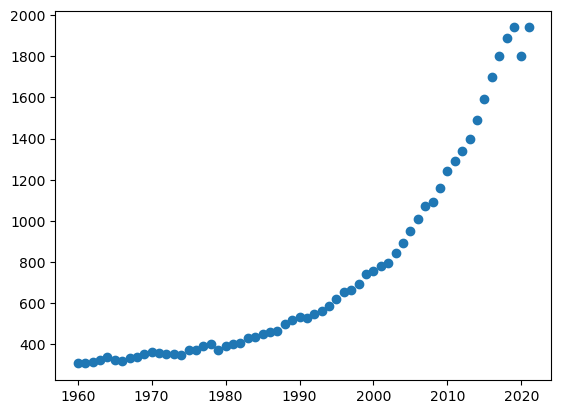

In [30]:
plt.scatter(x='year',y= 'India',data=count)

In [31]:
country = count

In [32]:
country

,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1960,4612,4612,4612,4612,4612,4612,7410,4612,4612,...,4612,1890,4612,4612,4612,4612,4612,3970,1200,1140
1,1961,4626,4626,4626,4626,4626,4626,7690,4626,4626,...,4626,1940,4626,4626,4626,4626,4626,4010,1180,1170
2,1962,4756,4756,4756,4756,4756,4756,7500,4756,4756,...,4756,1980,4756,4756,4756,4756,4756,4140,1110,1150
3,1963,4892,4892,4892,4892,4892,4892,6990,4892,4892,...,4892,1830,4892,4892,4892,4892,4892,4310,1110,1190
4,1964,5151,5151,5151,5151,5151,5151,7570,5151,5151,...,5151,1860,5151,5151,5151,5151,5151,4510,1210,1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,30300,589,2810,4250,39300,43400,13600,3990,12400,...,2940,7890,34400,2900,2800,4350,1220,6230,1320,1420
58,2018,31700,579,2680,4430,39300,43600,13100,4220,13000,...,3050,8150,35200,3090,2820,4280,1190,6250,1330,1460
59,2019,31800,584,2570,4540,39400,43800,12700,4560,13300,...,3160,8210,36300,3290,2840,4420,16833,6190,1310,1340
60,2020,25800,553,2350,4410,34400,41300,11300,4260,14300,...,3160,7800,35600,3350,2620,4220,15233,5730,1240,1210


In [33]:
country.rename(columns={'year': ''}, inplace=True)

In [34]:
country.set_index('')


,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uzbekistan,St. Vincent and the Grenadines,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
,,,,,,,,,,,,,,,,,,,,,
1960,4612,4612,4612,4612,4612,4612,7410,4612,4612,4612,...,4612,1890,4612,4612,4612,4612,4612,3970,1200,1140
1961,4626,4626,4626,4626,4626,4626,7690,4626,4626,4626,...,4626,1940,4626,4626,4626,4626,4626,4010,1180,1170
1962,4756,4756,4756,4756,4756,4756,7500,4756,4756,4756,...,4756,1980,4756,4756,4756,4756,4756,4140,1110,1150
1963,4892,4892,4892,4892,4892,4892,6990,4892,4892,4892,...,4892,1830,4892,4892,4892,4892,4892,4310,1110,1190
1964,5151,5151,5151,5151,5151,5151,7570,5151,5151,5151,...,5151,1860,5151,5151,5151,5151,5151,4510,1210,1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,30300,589,2810,4250,39300,43400,13600,3990,12400,16000,...,2940,7890,34400,2900,2800,4350,1220,6230,1320,1420
2018,31700,579,2680,4430,39300,43600,13100,4220,13000,17000,...,3050,8150,35200,3090,2820,4280,1190,6250,1330,1460
2019,31800,584,2570,4540,39400,43800,12700,4560,13300,17700,...,3160,8210,36300,3290,2840,4420,16833,6190,1310,1340
